In [1]:
#remember to put http://www.astro.wisc.edu/~townsend/resource/tools/mesa-web/mesa_web.py into the same directory from which you run this notebook
#note that there is abug in that library and you should edit line 316 as follows
#return read_profile(op.dirname(filename)+'/'+f'profile{prof_num[i]}.data', as_table)
#The version included with this notebook has that bug already fixed
import mesa_web
from astropy.table import QTable
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_history=mesa_web.read_history('MESA-Web_Job_1020211502/trimmed_history.data', as_table=True)

In [3]:
help(mesa_web.read_history)

Help on function read_history in module mesa_web:

read_history(filename, as_table=False)
    Read data from a MESA-Web history file
    
    Parameters
    ----------
    
    filename -- string giving name of history file
    as_table -- boolean flag indicating the format of the data returned: 
                    True: return as astropy.table.Table object
                    False: return as Python dict (default)
    
    Returns
    -------
    
    hist_data -- dict or Table containing header and history data 
                 (see below for details)
    
    Header Data 
    -----------
    
    The following keys/value pairs in the returned dict (or the Table.meta dict)
    contain header data -- i.e., scalars describing time-independent properties
    of the star. Where applicable, units are given in square brackets [].
    
      version_number   -- version number of MESA
      compiler         -- name of compiler used to build MESA
      build            -- version of compile

In [4]:
data_history

model_number,star_age,star_mass,log_L,log_R,log_Teff,log_center_T,log_center_Rho,log_center_P,center_h1,center_he3,center_he4,center_c12,center_n14,center_o16,center_ne20,center_mg24,center_si28,center_s32,center_ar36,center_ca40,center_ti44,center_cr48,center_fe52,center_fe54,center_fe56,center_ni56,center_degeneracy,center_ye,center_entropy,compactness_parameter,dynamic_timescale,kh_timescale,nuc_timescale,pp,cno,tri_alfa,log_LH,log_LHe,log_LZ,log_Lneu,he_core_mass,c_core_mass,o_core_mass,si_core_mass,fe_core_mass,he_core_radius,c_core_radius,o_core_radius,si_core_radius,fe_core_radius,max_abs_v_velocity,surf_avg_omega_div_omega_crit,log_total_angular_momentum,surf_avg_omega,surf_avg_v_rot,star_mdot
int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,1e-05,0.9999999999999962,2.510639322685555,1.4683078870900974,3.655135305352653,5.477059944000285,-3.2889359138551715,10.31164352941012,0.7,2.9797635251138614e-05,0.27997020236474884,0.0041193902129486445,0.0012067031330276047,0.01120387641666653,0.0025129237964844936,0.0009571064408727462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.043653696488013,0.8500049662725416,25.489672159858674,0.0,1595862.2518078738,2463.952488373874,30857495.7120361,-20.882648821283688,-98.99999999999999,-98.99999999999999,-20.882648821283688,-98.99999999999999,-98.99999999999999,-22.280516834009948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-98.99999999999999,0.0,0.0,-3.8325567540292867e-10
2,2.2000000000000003e-05,0.9999999999999916,2.507447260648761,1.4682800402552996,3.6543512132608535,5.477059916959586,-3.2889358534011177,10.31164356213508,0.7,2.9797635251138618e-05,0.27997020236474884,0.0041193902129486445,0.0012067031330276047,0.01120387641666653,0.0025129237964844936,0.0009571064408727463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.043653468953291,0.8500049662725416,25.489671788787703,0.0,1595708.7698596474,2482.28840171363,31085133.678727545,-20.882649031080266,-98.99999999999999,-98.99999999999999,-20.882649031080266,-98.99999999999999,-98.99999999999999,-22.280517043806526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-98.99999999999999,0.0,0.0,-3.810721419571994e-10
3,3.6400000000000004e-05,0.9999999999999861,2.5038430034212444,1.468247451117339,3.6534664435229542,5.477060110769831,-3.2889354470137655,10.311644163400764,0.7,2.9797635251138614e-05,0.27997020236474884,0.0041193902129486445,0.0012067031330276047,0.01120387641666653,0.0025129237964844936,0.0009571064408727464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.043653211469152,0.8500049662725416,25.489671370568146,0.0,1595529.1687519865,2503.1627331169198,31344186.055363767,-20.88264508690329,-98.99999999999999,-98.99999999999999,-20.88264508690329,-98.99999999999999,-98.99999999999999,-22.280513099629463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-98.99999999999999,0.0,0.0,-3.782572773482751e-10
4,5.368e-05,0.9999999999999797,2.4998220001163785,1.4682094707280628,3.6524801828913764,5.477060121331465,-3.2889353095642737,10.31164431093924,0.7,2.9797635251138618e-05,0.27997020236474884,0.0041193902129486445,0.0012067031330276047,0.01120387641666653,0.0025129237964844936,0.0009571064408727462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.043652938139285,0.8500049662725416,25.489670925137883,0.0,1595319.8815737145,2526.667348678235,31635740.165502384,-20.88264456164293,-98.99999999999999,-98.99999999999999,-20.88264456164293,-98.99999999999999,-98.99999999999999,-22.280512574369087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-98.99999999999999,0.0,0.0,-3.7510292079821363e-10
5,7.4416e-05,0.9999999999999719,2.495214779403055,1.46816499

In [5]:
mask = ((data_history['pp'] > 0) & (data_history['log_R']>0))

In [6]:
data_history[mask]

model_number,star_age,star_mass,log_L,log_R,log_Teff,log_center_T,log_center_Rho,log_center_P,center_h1,center_he3,center_he4,center_c12,center_n14,center_o16,center_ne20,center_mg24,center_si28,center_s32,center_ar36,center_ca40,center_ti44,center_cr48,center_fe52,center_fe54,center_fe56,center_ni56,center_degeneracy,center_ye,center_entropy,compactness_parameter,dynamic_timescale,kh_timescale,nuc_timescale,pp,cno,tri_alfa,log_LH,log_LHe,log_LZ,log_Lneu,he_core_mass,c_core_mass,o_core_mass,si_core_mass,fe_core_mass,he_core_radius,c_core_radius,o_core_radius,si_core_radius,fe_core_radius,max_abs_v_velocity,surf_avg_omega_div_omega_crit,log_total_angular_momentum,surf_avg_omega,surf_avg_v_rot,star_mdot
int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
300,5248819534.830194,0.9998287392185762,0.013408885211151994,0.008782029598565727,3.760590624729818,7.206389887573047,2.22405961994907,17.397137992319745,0.2901187538887169,4.9747495467226546e-06,0.6893297025774995,2.8319810610581376e-05,0.006926552582157466,0.01012166615411169,0.0025129237964844962,0.000957106440872746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.4997694151707226,0.6450602060692828,10.23525867084407,0.0,10321.523552043469,22296662.301597238,9694306150.289854,0.003014807504090345,-1.6086141295157625,-42.188970214553215,0.013507774992799176,-42.188970214553215,-98.99999999999999,-1.5813842744454945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-98.99999999999999,0.0,0.0,-4.156009101586185e-14
301,5360146175.228835,0.9998240519008449,0.017387779208559533,0.010440885756864415,3.7607559201500207,7.208632150880913,2.233186540112828,17.403590295995148,0.2798784808729715,4.5107655777431935e-06,0.6995823746993574,2.8934906787471016e-05,0.007008663212749311,0.010027005305199442,0.0025129237964844962,0.000957106440872746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.4938240376778,0.6399399922307485,10.103714525179269,0.0,10380.854648497605,22008884.63677441,9605850003.151373,0.006162733969787625,-1.5718334883374596,-42.04912973378916,0.017489666500287424,-42.04912973378916,-15.653559774527022,-1.5735745713791351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-98.99999999999999,0.0,0.0,-4.21041874116975e-14
302,5470374460.648872,0.9998193501660538,0.02134812173542469,0.012107338823184894,3.760912779248577,7.210892818994348,2.2423934573256448,17.410082152892063,0.26963306835106854,4.0717193506155156e-06,0.709841057511467,2.9586826492726073e-05,0.007096960774627273,0.00992522457963667,0.0025129237964844962,0.000957106440872746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.487656171097844,0.6348172127954259,9.970935458047158,0.0,10440.80082300187,21725368.611375112,9518607432.163916,0.009216909660451682,-1.5347871569267961,-41.90876836628721,0.021453143364817667,-41.90876836628721,-15.35252977886304,-1.5656624805333066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-98.99999999999999,0.0,0.0,-4.2654521688298343e-14
303,5579490202.612561,0.9998146351701007,0.025288192698151118,0.013780857108287907,3.761061037846707,7.213171263422094,2.2516827900470626,17.416613597313003,0.25938222915870957,3.657569276844528e-06,0.7201060800818584,3.027768916250406e-05,0.007191733357441943,0.009815991906193533,0.0025129237964844962,0.000957106440872746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.4812835182873587,0.6296917241742341,9.836788453394062,0.0,10501.34949260602,21446156.37886677,9432597368.333767,0.012168897989953764,-1.4975046913213403,-41.76791507318346,0.025396470448659707,-41.76791507318346,-98.99999999999999,-1.5576505203264903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-98.99999999999

In [7]:
profile=mesa_web.find_read_profile('MESA-Web_Job_1020211502/profiles.index', model_number=300,as_table=True)
##profile=mesa_web.read_profile('MESA-Web_Job_1020211502/profile9.data', as_table=True)

In [8]:
profile

mass,radius,luminosity,pressure,logRho,logT,energy,entropy,cp,gamma1,grada,mu,free_e,ye,pgas,prad,gradr,gradT,velocity,conv_vel,opacity,eps_nuc,pp,cno,tri_alfa,eps_nuc_neu_total,non_nuc_neu,eps_grav,h1,he3,he4,c12,n14,o16,ne20,mg24,si28,s32,ar36,ca40,ti44,cr48,fe52,fe54,fe56,ni56,eta,log_omega,v_rot,j_rot,dynamo_log_B_r,dynamo_log_B_phi,log_D_conv,log_D_semi,log_D_ovr,log_D_thrm
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
7.813020655590097e-08,0.0008693332783837788,7.219411209311088e-07,2.4953874830606848e+17,2.22405961994907,7.206389887573047,2233952240029916.5,10.235258670844068,228061143.23310438,1.6652593585308946,0.39568634940519626,0.9044133378739517,0.6412691049470145,0.6450602060692829,2.493699798490454e+17,168768457023087.0,0.3253735699995399,0.3253735699995399,0.0,0.0,1.2401814873644765,17.84051351256752,14.412217865108572,3.4282956474589468,5.1449882196899824e-40,0.7507275857577659,1.0842883119102182e-07,0.005413447645116637,0.2901187538887169,4.9747495467226546e-06,0.6893297025774995,2.8319810610581376e-05,0.006926552582157466,0.01012166615411169,0.0025129237964844962,0.000957106440872746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.4997694151707224,-98.99999999999999,0.0,0.0,-98.99999999999999,-98.99999999999999,-99.0,-99.0,-99.0,-99.0
1.562604234351078e-07,0.0010953000889654368,1.4438499944043557e-06,2.4952917510516342e+17,2.224038760464873,7.206384466389686,2233973917213374.8,10.235520744786792,228066373.52202457,1.6652593734054535,0.3956864012847238,0.9043933542010437,0.641278976857895,0.6450703136154318,2.4936041507469834e+17,168760030465089.66,0.3253745961910294,0.3253745961910294,0.0,0.0,1.2402024819038888,17.839714374601176,14.412279764147058,3.4274346104541173,5.14092721176181e-40,0.7506534128743969,1.0841595563463945e-07,0.005413095613369032,0.2901389686355938,4.975785809143418e-06,0.6893094555057454,2.8318264470892454e-05,0.006926337169514242,0.01012191440150924,0.0025129237964844954,0.0009571064408727457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.499784388592708,-98.99999999999999,0.0,0.0,-98.99999999999999,-98.99999999999999,-99.0,-99.0,-99.0,-99.0
3.1252085697151484e-07,0.00138001030627039,2.8875901961288863e-06,2.4951777808772906e+17,2.2240139689108345,7.206378012143536,2233999504198723.5,10.235831635533215,228072577.71919546,1.6652593913051357,0.3956864628668955,0.9043696516331442,0.6412906872421105,0.6450823028750415,2.4934902808904147e+17,168749998687591.53,0.3253754119702827,0.3253754119702827,0.0,0.0,1.240227470680332,17.83875638190279,14.412347242916569,3.426409138986224,5.136099513820146e-40,0.7505648960126502,1.0840062443922845e-07,0.005412674745008583,0.2901629467442823,4.9770174033319265e-06,0.6892854389414722,2.8316424544800415e-05,0.006926080894741439,0.010122209740198658,0.002512923796484496,0.0009571064408727456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.4998021808815887,-98.99999999999999,0.0,0.0,-98.99999999999999,-98.99999999999999,-99.0,-99.0,-99.0,-99.0
6.250417238223224e-07,0.001738742055215575,5.774824491386022e-06,2.4949968742861485e+17,2.2239746135357117,7.206367766620294,2234040126882776.0,10.236325177303101,228082427.13047534,1.6652594197583896,0.3956865607178178,0.9043320258424874,0.6413092794820506,0.6451013364169467,2.4933095335322845e+17,168734075386392.3,0.3253763043820883,0.3253763043820883,0.0,0.0,1.2402671385604074,17.837236153069064,14.412454205805934,3.4247819472631287,5.128445121779207e-40,0.7504244196349573,1.0837629209275117e-07,0.005412006809021007,0.2902010131762512,4.978972926848304e-06,0.6892473114809549,2.831350445687261e-05,0.006925674197105152,0.0101226784309478

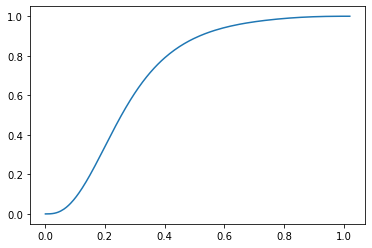

In [9]:
plt.plot(profile['radius'],profile['mass'])

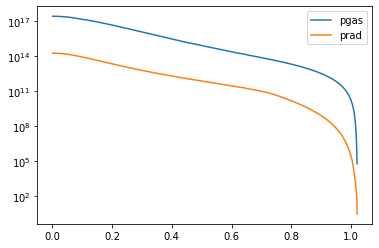

In [10]:
plt.semilogy(profile['radius'],profile['pgas'], label='pgas')
plt.semilogy(profile['radius'],profile['prad'], label='prad')
plt.legend()

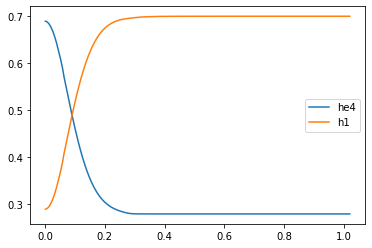

In [11]:
plt.plot(profile['radius'],profile['he4'], label='he4')
plt.plot(profile['radius'],profile['h1'], label='h1')
plt.legend()